# Capstone Project: Traffic Volume Analysis
---
Project notebook organisation:<br>
[1 - EDA and preprocessing](./1_eda_and_preprocessing.ipynb)<br>
[2 - Modelling and insights](./2_modelling_and_insights.ipynb)<br>
**3 - Appendix** (current notebook)<br>
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import FunctionTransformer, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score

sns.set_style('ticks')
pd.set_option('display.max_columns', None)

%matplotlib inline

## Introduction

This notebook contains code for the rest of the models I ran, that were not in the main modelling notebook (i.e. everything up to Regression (machine learning)). Note that due to size constraints, the datasets used in this notebook are not included in the Github repository. The deep learning models were also ported over from Google Colab and may cause the Jupyter kernel to crash when run. Therefore this notebook is intended to be for reference only.

<img src='../graphics/modelling_roadmap.png'>

## Contents

1. [Classification (machine learning)](#Classification-(machine-learning))
2. [Classification (deep learning)](#Classification-(deep-learning))
3. [Regression (deep learning)](#Regression-(deep-learning))

## Classification (machine learning)

### import data

In [3]:
df = pd.read_pickle('../../classificationdata.zip')
df.head(1)

,date,time,whites,blobs,image,hour,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,traffic
0,2019-10-30,2019-11-14 09:25:35,768,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, ...",low


### using only white pixels as predictors

In [86]:
x = df[['whites']]
y = df['traffic'].map({'low':0, 'med':1, 'high':2})

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=7, stratify=y)

#### logistic regression

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Logreg CV accuracy: 0.8509864944216089

Logreg CV confusion matrix:


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.3s finished


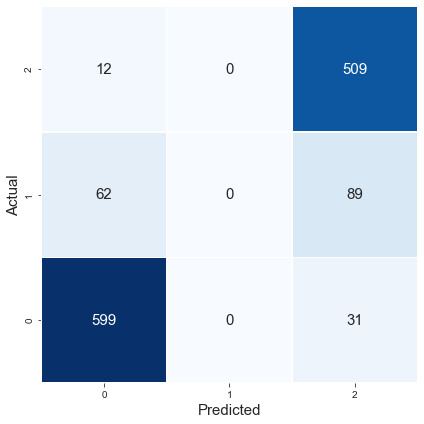

In [90]:
lr = LogisticRegression()
cv = cross_val_score(lr, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'Logreg CV accuracy: {cv.mean()}\n')

print("Logreg CV confusion matrix:")
ypred = cross_val_predict(lr, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

#### knn

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.0s finished


KNN CV accuracy: 0.8386846741045215

KNN CV confusion matrix:


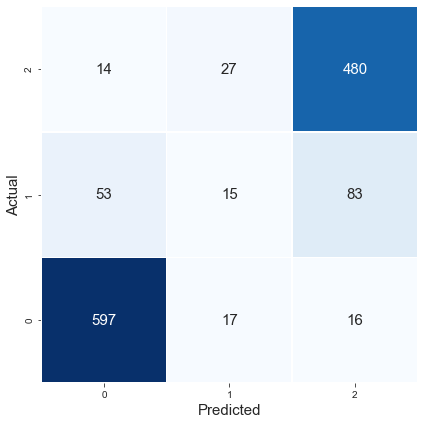

In [91]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'KNN CV accuracy: {cv.mean()}\n')

print("KNN CV confusion matrix:")
ypred = cross_val_predict(knn, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

#### multinomial NB

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Multinomial NB CV accuracy: 0.483875513799178

Multinomial NB CV confusion matrix:


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.0s finished


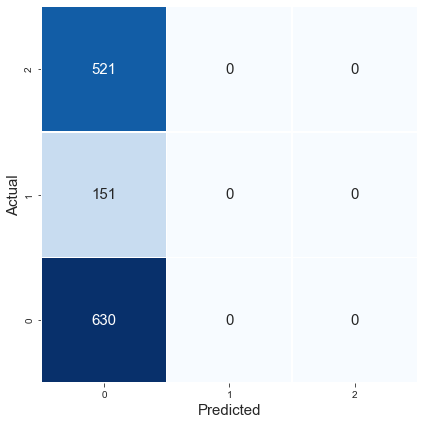

In [92]:
nb = MultinomialNB()
cv = cross_val_score(nb, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'Multinomial NB CV accuracy: {cv.mean()}\n')

print("Multinomial NB CV confusion matrix:")
ypred = cross_val_predict(nb, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

#### decision tree

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Decision tree CV accuracy: 0.7849324721080446

Decision tree CV confusion matrix:


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.0s finished


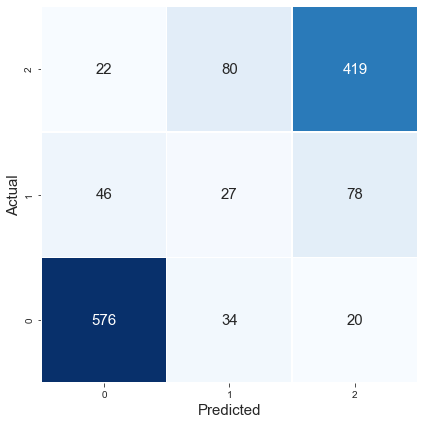

In [93]:
tree = DecisionTreeClassifier()
cv = cross_val_score(tree, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'Decision tree CV accuracy: {cv.mean()}\n')

print("Decision tree CV confusion matrix:")
ypred = cross_val_predict(tree, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

### using all features

In [18]:
x = df[[col for col in df_img if col != 'traffic']]
y = df['traffic'].map({'low':0, 'med':1, 'high':2})

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=7, stratify=y)

In [19]:
xtrain.head()

,image,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1013,27.865163,0.060355,33.919527,6.820118,0.0,64.519527,83.350296,0.000000,0.0,40.679290,90.110059,77.013018,5.975148,0.0,0.181065,41.222485,1.991716
1670,36.548743,3.319527,45.809467,12.372781,0.0,81.237870,70.132544,0.000000,0.0,32.289941,158.069822,121.313609,8.510059,0.0,3.440237,42.489941,5.794083
1217,32.437056,1.991716,53.715976,10.200000,0.0,70.373964,67.114793,0.000000,0.0,20.339645,138.333728,97.956213,9.475740,0.0,0.482840,39.291124,9.717160
289,3.511908,0.482840,1.086391,0.422485,0.0,42.067456,4.164497,0.000000,0.0,3.078107,1.327811,1.810651,0.482840,0.0,0.120710,0.422485,0.724260
1027,56.948743,0.965680,57.457988,18.589349,0.0,125.659172,111.837870,0.060355,0.0,129.884024,216.976331,125.115976,14.545562,0.0,30.479290,60.596450,19.011834


#### logistic regression

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    1.7s finished


Logreg CV accuracy: 0.904726952436876

Logreg CV confusion matrix:


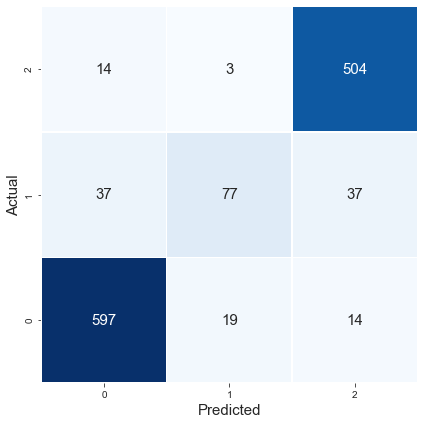

In [22]:
lr = LogisticRegression()
cv = cross_val_score(lr, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'Logreg CV accuracy: {cv.mean()}\n')

print("Logreg CV confusion matrix:")
ypred = cross_val_predict(lr, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

##### feature importance

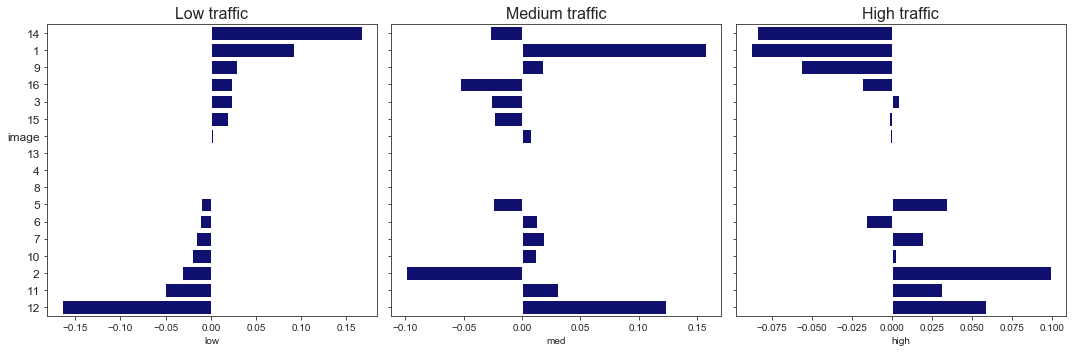

In [58]:
lr.fit(xtrain, ytrain)

# get coefficients
coef_labels = [col for col in xtrain.columns]
lr_coef = pd.DataFrame(lr.coef_, columns=coef_labels, index=['low','med','high']).T
lr_coef = lr_coef.sort_values(['low'], ascending=False)

# plot coefficients
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(15,5), sharey=True)
sns.barplot(lr_coef.loc[:,'low'], lr_coef.index, color='navy', ax = ax1)
ax1.set_title("Low traffic", fontsize=16)
ax1.tick_params(axis='y', which='major', labelsize=12)
sns.barplot(lr_coef.loc[:,'med'], lr_coef.index, color='navy', ax = ax2)
ax2.set_title("Medium traffic", fontsize=16)
sns.barplot(lr_coef.loc[:,'high'], lr_coef.index, color='navy', ax = ax3)
ax3.set_title("High traffic", fontsize=16)

plt.tight_layout()

#### knn

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:   12.1s finished


KNN CV accuracy: 0.9247269524368761

KNN CV confusion matrix:


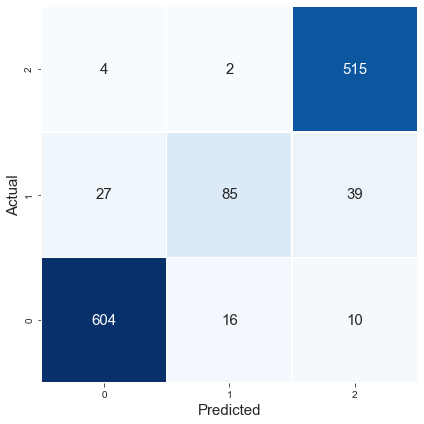

In [59]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'KNN CV accuracy: {cv.mean()}\n')

print("KNN CV confusion matrix:")
ypred = cross_val_predict(knn, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

#### decision tree

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Decision tree CV accuracy: 0.9062771579565473

Decision tree CV confusion matrix:


[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    1.8s finished


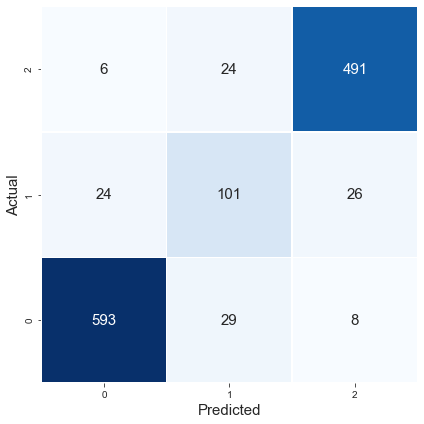

In [60]:
tree = DecisionTreeClassifier()
cv = cross_val_score(tree, xtrain, ytrain, cv=5, scoring='accuracy', n_jobs=-2, verbose=True)
print(f'Decision tree CV accuracy: {cv.mean()}\n')

print("Decision tree CV confusion matrix:")
ypred = cross_val_predict(tree, xtrain, ytrain, cv=5)
cmatrix = confusion_matrix(ytrain, ypred)
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5, cbar=False)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

## Classification (deep learning)

### import data

In [0]:
df = pd.read_pickle('processed.zip')
df.head(2)

,date,time,whites,blobs,image,hour,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,traffic
0,2019-10-30,2019-11-14 09:25:35,768,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, ...",low
1,2019-10-30,2019-11-14 09:26:35,2217,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",9,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",low


In [0]:
# using only the image for CNN
x = df['image'].apply(lambda x:x.astype('float32')/255)
y = df['traffic'].map({'low':0, 'med':1, 'high':2})

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=7, stratify=y)

# reshape xtrain and xtest for CNN
xtrain_rs = np.array([x.reshape(260,260,1) for x in xtrain])
xtest_rs = np.array([x.reshape(260,260,1) for x in xtest])
print(xtrain.shape)

# convert targets to categorical 
ytrain = np_utils.to_categorical(ytrain,3)
ytest = np_utils.to_categorical(ytest, 3)
print(ytrain.shape)

(1302,)
(1302, 3)


### compile model

In [0]:
cnnmod = Sequential()
cnnmod.add(Conv2D(filters=6, kernel_size=3, activation='relu', input_shape=(260,260,1)))
cnnmod.add(MaxPooling2D(pool_size=(2,2)))
cnnmod.add(Conv2D(filters=4, kernel_size=3, activation='relu'))  
cnnmod.add(MaxPooling2D(pool_size=(2,2)))
cnnmod.add(Conv2D(filters=4, kernel_size=3, activation='relu'))  
cnnmod.add(MaxPooling2D(pool_size=(2,2)))

cnnmod.add(Flatten())
cnnmod.add(Dense(16, activation='relu'))
cnnmod.add(Dropout(0.5))
cnnmod.add(Dense(3, activation='softmax'))

cnnmod.compile(loss='categorical_crossentropy', 
               optimizer='adam',
               metrics=['accuracy'])

cnnmod.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 258, 258, 6)       60        
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 129, 129, 6)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 127, 127, 4)       220       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 61, 61, 4)         148       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 30, 30, 4)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3600)            

### train model

In [0]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode = 'auto')

history = cnnmod.fit(xtrain_rs, ytrain, 
                     validation_data=(xtest_rs, ytest),
                     epochs=15,
                     batch_size=32,
                     verbose=True,
                     callbacks = [es])

Train on 1302 samples, validate on 435 samples
Epoch 1/15
1302/1302 [==============================] - 40s 31ms/step - loss: 0.6628 - acc: 0.7496 - val_loss: 0.2383 - val_acc: 0.9103
Epoch 2/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.3125 - acc: 0.8810 - val_loss: 0.1947 - val_acc: 0.9264
Epoch 3/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.2489 - acc: 0.8955 - val_loss: 0.1390 - val_acc: 0.9586
Epoch 4/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.2146 - acc: 0.9263 - val_loss: 0.1216 - val_acc: 0.9678
Epoch 5/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.1720 - acc: 0.9363 - val_loss: 0.0858 - val_acc: 0.9678
Epoch 6/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.1576 - acc: 0.9409 - val_loss: 0.0969 - val_acc: 0.9586
Epoch 7/15
1302/1302 [==============================] - 39s 30ms/step - loss: 0.1567 - acc: 0.9470 - val_loss: 0.0799 - val_acc: 0.9678
E

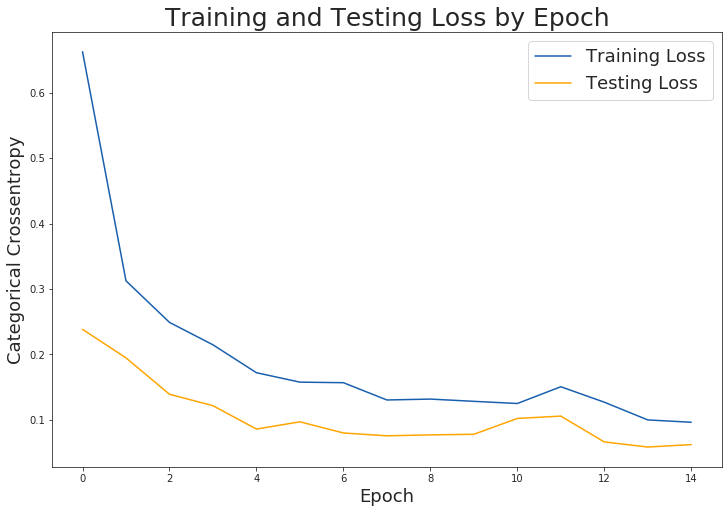

In [0]:
# plot loss by epoch
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

### evaluate model

435/435 [==============================] - 5s 12ms/step
loss: 0.06212882055719009
acc: 0.9816091954022989
Test confusion matrix:


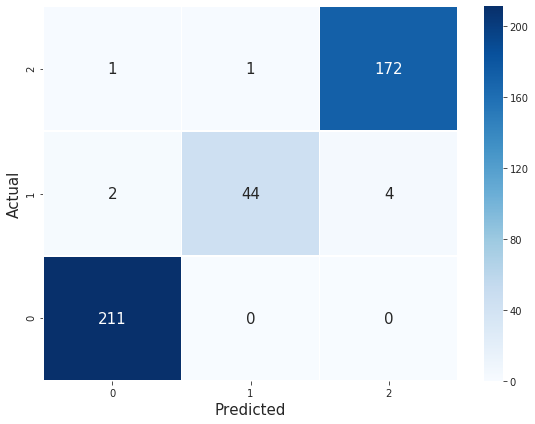

In [0]:
score = cnnmod.evaluate(xtest_rs, ytest)
ypred = cnnmod.predict(xtest_rs)

# accuracy and loss
labels = cnnmod.metrics_names
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

# confusion matrix
ypred_class = np.argmax(ypred, axis=1)
ytest_class = np.argmax(ytest, axis=1)
cmatrix = confusion_matrix(ytest_class, ypred_class)

print('Test confusion matrix:')
plt.figure(figsize=(8,6))
sns.heatmap(cmatrix, annot=True, annot_kws={"size": 15}, fmt='g', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.tight_layout()

#### misclassified images

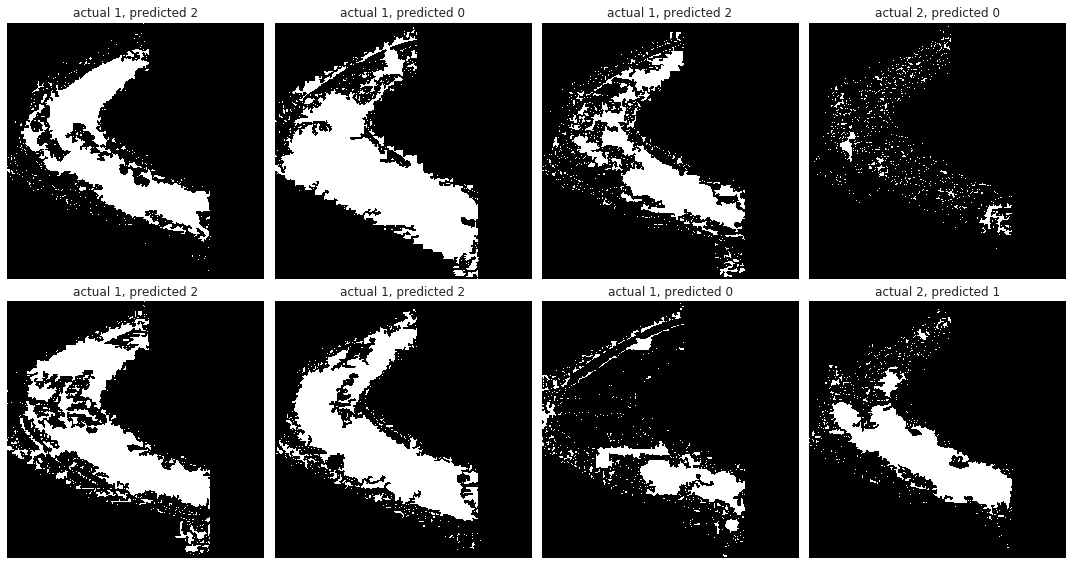

In [0]:
testdf = pd.DataFrame({'test_images':xtest, 'actual':ytest_class, 'predicted':ypred_class})

# slice out misclassified images
misclass = testdf[testdf.actual != testdf.predicted]
misclass.reset_index(inplace=True, drop=True)

# plot misclassified images
fig, ax = plt.subplots(ncols = 4, nrows = int(misclass.shape[0]/4), figsize=(15,int(misclass.shape[0])))
ax = ax.ravel()
for index, img in enumerate(misclass['test_images']):
    ax[index].imshow(img, cmap = plt.cm.gray)
    actual_class = misclass.loc[index, 'actual']
    predicted_class = misclass.loc[index, 'predicted']
    ax[index].set_title(f'actual {actual_class}, predicted {predicted_class}')
for ax in ax:
    ax.axis('off')
plt.tight_layout()

## Regression (deep learning)

### using original (unprocessed) images

This had terrible performance.

#### import data

In [0]:
xtrain = pd.read_pickle('xtrain_orig.zip')
xtest = pd.read_pickle('xtest_orig.zip')

# reshape for cnn
xtrain = xtrain['image'].apply(lambda x:x.astype('float32')/255)
xtest = xtest['image'].apply(lambda x:x.astype('float32')/255)

xtrain_rs = np.array([x.reshape(260,260,1) for x in xtrain])
xtest_rs = np.array([x.reshape(260,260,1) for x in xtest])

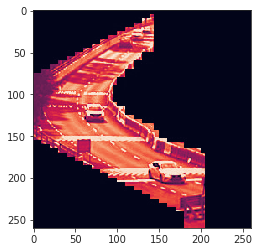

In [0]:
plt.imshow(xtrain[0])

#### compile model

In [0]:
# build model
cnnmod3 = Sequential()
cnnmod3.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(260,260,1))) 
cnnmod3.add(MaxPooling2D(pool_size=(2,2)))
cnnmod3.add(Conv2D(filters=4, kernel_size=3, activation='relu')) 
cnnmod3.add(MaxPooling2D(pool_size=(2,2)))
cnnmod3.add(Conv2D(filters=4, kernel_size=3, activation='relu')) 
cnnmod3.add(MaxPooling2D(pool_size=(2,2)))
cnnmod3.add(Conv2D(filters=4, kernel_size=3, activation='relu')) 
cnnmod3.add(MaxPooling2D(pool_size=(2,2)))

cnnmod3.add(Flatten())
cnnmod3.add(Dense(16, activation='relu')) 
cnnmod3.add(Dropout(0.5))
cnnmod3.add(Dense(1, activation='linear'))

cnnmod3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 258, 258, 16)      160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 129, 129, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 127, 127, 4)       580       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 4)         148       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 4)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 4)        

Train on 30 samples, validate on 30 samples
Epoch 1/50
30/30 [==============================] - 3s 100ms/step - loss: 689.2164 - val_loss: 783.3976
Epoch 2/50
30/30 [==============================] - 1s 49ms/step - loss: 688.2267 - val_loss: 782.2370
Epoch 3/50
30/30 [==============================] - 1s 49ms/step - loss: 687.0554 - val_loss: 781.1116
Epoch 4/50
30/30 [==============================] - 1s 50ms/step - loss: 686.4104 - val_loss: 779.8152
Epoch 5/50
30/30 [==============================] - 1s 49ms/step - loss: 684.7111 - val_loss: 778.3245
Epoch 6/50
30/30 [==============================] - 1s 49ms/step - loss: 683.0942 - val_loss: 776.4918
Epoch 7/50
30/30 [==============================] - 2s 51ms/step - loss: 682.9623 - val_loss: 774.3184
Epoch 8/50
30/30 [==============================] - 1s 49ms/step - loss: 678.5804 - val_loss: 771.7891
Epoch 9/50
30/30 [==============================] - 1s 49ms/step - loss: 676.0754 - val_loss: 768.7043
Epoch 10/50
30/30 [=========

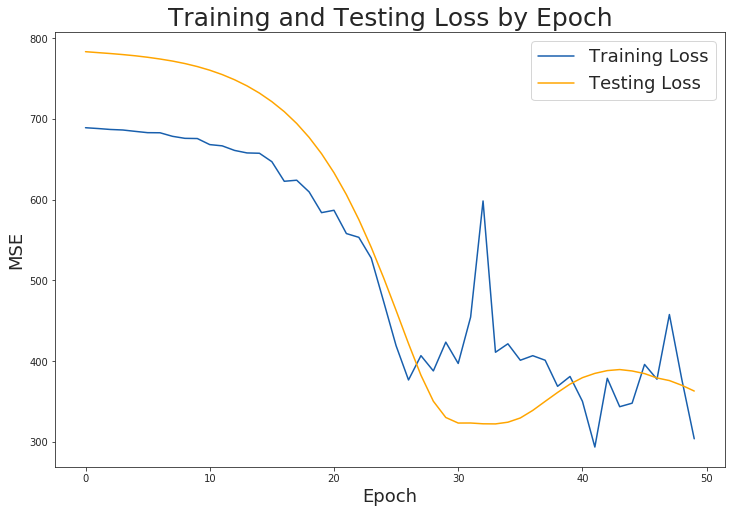

In [0]:
cnnmod3.compile(loss='mean_squared_error', optimizer='adam')

es = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,mode = 'auto')

history3 = cnnmod3.fit(xtrain_rs, ytrain, 
                       validation_data=(xtest_rs, ytest),
                       epochs=50,
                       batch_size=30,
                       verbose=1)

# plot train loss and test loss over epochs
train_loss = history3.history['loss']
test_loss = history3.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.legend(fontsize = 18)

plt.tight_layout()

#### evaluate model

In [0]:
ypred_train = cnnmod3.predict(xtrain_rs)
ypred_test = cnnmod3.predict(xtest_rs)

results_train = pd.DataFrame({'actual':ytrain.num_cars.values, 'predicted':ypred_train.reshape(30,)})
results_test = pd.DataFrame({'actual':ytest.num_cars.values, 'predicted':ypred_test.reshape(30,)})

# show actual vs predicted number of cars
print('Training set --')
print(results_train)
print('Testing set --')
print(results_test)

Training set --
    actual  predicted
0        5  13.699418
1        3  13.271531
2        3  13.769785
3        3  13.829800
4        4  13.787492
5        2  13.508642
6        2  13.488874
7        1  13.742797
8        1  13.701024
9        4  13.736274
10      54  15.273057
11      49  15.290540
12      43  15.239106
13      44  15.135212
14      44  15.281047
15      40  15.211707
16      36  15.398351
17      44  15.213557
18      38  15.382544
19      44  15.551633
20      20  14.668005
21      19  14.816668
22      11  14.712541
23       7  14.506070
24      11  14.428346
25      11  14.809665
26       4  13.971478
27       5  14.444484
28       7  14.437961
29       7  14.722693
Testing set --
    actual  predicted
0        9  13.189583
1       12  13.164807
2        5  13.427048
3        5  13.462171
4        3  13.931472
5        1  13.481307
6        1  13.672512
7        1  13.392238
8        2  13.400163
9        3  13.388093
10       2  13.521884
11       4  13.660590
1

### using processed images

#### convolutional neural network (CNN)

##### import data

In [0]:
xtrain = pd.read_pickle('xtrain.zip')
xval = pd.read_pickle('xval.zip')
xtest = pd.read_pickle('xtest.zip')

ytrain = pd.read_pickle('ytrain.zip')
yval = pd.read_pickle('yval.zip')
ytest = pd.read_pickle('ytest.zip')

# reshape for cnn
xtrain = xtrain['image'].apply(lambda x:x.astype('float32')/255)
xval = xval['image'].apply(lambda x:x.astype('float32')/255)
xtest = xtest['image'].apply(lambda x:x.astype('float32')/255)

xtrain_rs = np.array([x.reshape(260,260,1) for x in xtrain])
xval_rs = np.array([x.reshape(260,260,1) for x in xval])
xtest_rs = np.array([x.reshape(260,260,1) for x in xtest])

ytrain = np.array(ytrain.loc[5:,'num_cars'])
yval = np.array(yval.loc[5:,'num_cars'])
ytest = np.array(ytest.loc[5:,'num_cars'])

##### compile model

In [0]:
cnnmod4 = Sequential()
cnnmod4.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(260,260,1))) 
cnnmod4.add(MaxPooling2D(pool_size=(2,2)))
cnnmod4.add(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) 
cnnmod4.add(MaxPooling2D(pool_size=(2,2)))
cnnmod4.add(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) 
cnnmod4.add(MaxPooling2D(pool_size=(2,2)))
cnnmod4.add(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) 
cnnmod4.add(MaxPooling2D(pool_size=(2,2)))

cnnmod4.add(Flatten())
cnnmod4.add(Dense(16, activation='relu')) 
cnnmod4.add(Dense(1, activation='linear'))

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

cnnmod4.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae']) 

history4 = cnnmod4.fit(xtrain_rs, ytrain,
                       validation_data = (xval_rs, yval),
                       epochs=50,
                       batch_size=32,
                       verbose=1,
                       callbacks=[EarlyStopping(monitor='val_loss',min_delta=0,patience=20,mode='auto'),
                                  ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=10),
                                  ModelCheckpoint("cnn-{epoch:02d}-{val_mean_absolute_error:.2f}.hdf5", monitor='val_loss',)])




Train on 349 samples, validate on 389 samples
Epoch 1/50





349/349 [==============================] - 9s 26ms/step - loss: 1325.0671 - mean_absolute_error: 30.6684 - val_loss: 1228.2060 - val_mean_absolute_error: 31.1234
Epoch 2/50
349/349 [==============================] - 0s 878us/step - loss: 706.5564 - mean_absolute_error: 23.4052 - val_loss: 285.6171 - val_mean_absolute_error: 14.9903
Epoch 3/50
349/349 [==============================] - 0s 860us/step - loss: 310.3596 - mean_absolute_error: 12.8056 - val_loss: 264.3210 - val_mean_absolute_error: 12.7860
Epoch 4/50
349/349 [==============================] - 0s 836us/step - loss: 244.6092 - mean_absolute_error: 14.0210 - val_loss: 238.1876 - val_mean_absolute_error: 13.6755
Epoch 5/50
349/349 [==============================] - 0s 852us/step - loss: 193.3903 - mean_absolute_error: 11.2681 - val_loss: 208.6911 - val_mean_absolute_error: 11.0320
Epoch 6/50
349/349 [==============================] - 0s 836us/step - loss: 146.2847 

##### evaluate model

###### Test accuracy

In [0]:
from sklearn.metrics import mean_absolute_error

ypred = cnnmod4.predict(xtest_rs)
test_mae = mean_absolute_error(ytest, ypred)
test_mae

6.164263566670617

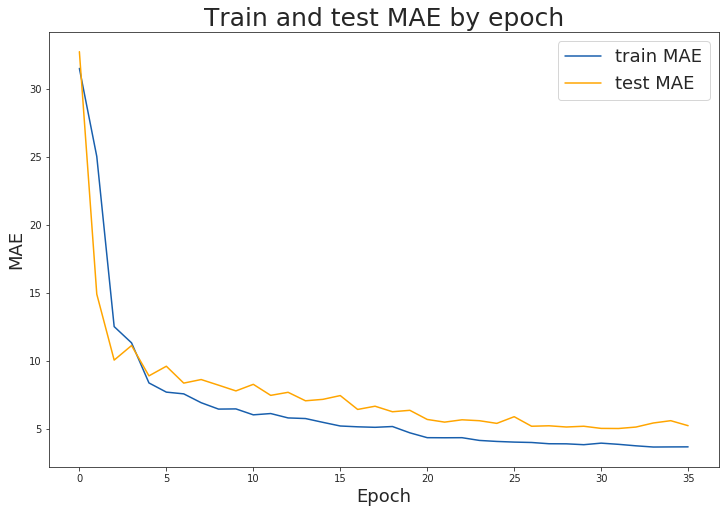

In [0]:
# train loss and test loss over epochs
train_loss = history4.history['mean_absolute_error']
test_loss = history4.history['val_mean_absolute_error']

# plot train and test loss
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train MAE', color='#185fad')
plt.plot(test_loss, label='test MAE', color='orange')

plt.title('Train and test MAE by epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('MAE', fontsize = 18)
# plt.ylim(-60, 2)
plt.legend(fontsize = 18);

Text(0.5, 1.0, 'test set')

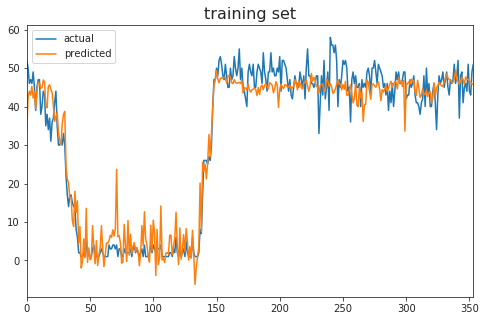

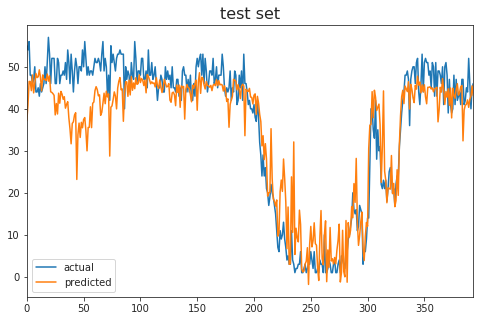

In [0]:
ypred_train = cnnmod4.predict(xtrain_rs)
ypred_test = cnnmod4.predict(xtest_rs)

results_train = pd.DataFrame({'actual':ytrain.num_cars.values, 'predicted':ypred_train.reshape(len(ypred_train),)})
results_test = pd.DataFrame({'actual':ytest.num_cars.values, 'predicted':ypred_test.reshape(len(ypred_test),)})

results_train.plot(figsize=(8,5))
plt.title("training set", fontsize=16)

results_test.plot(figsize=(8,5))
plt.title("test set", fontsize=16)

#### convolutional LSTM model

##### import data

In [0]:
xtrain = pd.read_pickle('xtrain.zip')
xtrain = xtrain['image'].apply(lambda x:x.astype('float32')/255)
xtrain_rs = np.array([x.reshape(260,260,1) for x in xtrain])

xval = pd.read_pickle('xval.zip')
xval = xval['image'].apply(lambda x:x.astype('float32')/255)
xval_rs = np.array([x.reshape(260,260,1) for x in xval])

xtest = pd.read_pickle('xtest.zip')
xtest = xtest['image'].apply(lambda x:x.astype('float32')/255)
xtest_rs = np.array([x.reshape(260,260,1) for x in xtest])

ytrain = pd.read_pickle('ytrain.zip')
ytrain = np.array(ytrain.loc[5:,'num_cars'])

yval = pd.read_pickle('yval.zip')
yval = np.array(yval.loc[5:,'num_cars'])

ytest = pd.read_pickle('ytest.zip')
ytest = np.array(ytest.loc[5:,'num_cars'])

In [0]:
# TimeseriesGenerator demo
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
target = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
train_sequences = TimeseriesGenerator(series, target, length=5, batch_size=1)

for i in range(len(train_sequences)):
    x, y = train_sequences[i]
    print(f'{x} => {y}')

[[1 2 3 4 5]] => [6]
[[2 3 4 5 6]] => [7]
[[3 4 5 6 7]] => [8]
[[4 5 6 7 8]] => [9]
[[5 6 7 8 9]] => [10]


In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

# timesteps 3 and 5 tested
timesteps = 3
train_sequences = TimeseriesGenerator(xtrain_rs, ytrain, length=timesteps, batch_size=1)
val_sequences = TimeseriesGenerator(xval_rs, yval, length=timesteps, batch_size=1)
test_sequences = TimeseriesGenerator(xtest_rs, ytest, length=timesteps, batch_size=1)

# sanity check
batch_x, batch_y = test_sequences[0]
batch_x.shape

(1, 3, 260, 260, 1)

##### compile model

In [0]:
convlstm = Sequential()
convlstm.add(TimeDistributed(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'),
            input_shape=(3,260,260,1)))
convlstm.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
convlstm.add(TimeDistributed(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) )
convlstm.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
convlstm.add(TimeDistributed(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) )
convlstm.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
convlstm.add(TimeDistributed(Conv2D(filters=4, kernel_size=3, activation='relu', padding='same')) )
convlstm.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

convlstm.add(TimeDistributed(Flatten()))
convlstm.add(LSTM(10, return_sequences=False)) #5

convlstm.add(Dense(16, activation='relu')) 
convlstm.add(Dense(1, activation='linear'))

convlstm.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 3, 258, 258, 16)   160       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 129, 129, 16)   0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 127, 127, 4)    580       
_________________________________________________________________
time_distributed_4 (TimeDist (None, 3, 63, 63, 4)      0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 3, 61, 61, 4)      148       
_________________________________________________________________
time_distributed_6 (TimeDist (None, 3, 30, 30, 4)      0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 3, 28, 28, 4)  

In [0]:
convlstm.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae']) 

history5 = convlstm.fit_generator(train_sequences,
                                 validation_data = test_sequences,
                                 epochs=20,
                                 verbose=1,
                                 callbacks=[EarlyStopping(monitor='val_loss',min_delta=0,patience=20,mode='auto'),
                                            ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=10),
                                            ModelCheckpoint("model-{epoch:02d}-{val_mean_absolute_error:.2f}.hdf5", monitor='val_loss',)])

Epoch 1/20
351/351 [==============================] - 11s 31ms/step - loss: 1017.2783 - mean_absolute_error: 27.1080 - val_loss: 697.6162 - val_mean_absolute_error: 23.1973
Epoch 2/20
351/351 [==============================] - 10s 27ms/step - loss: 289.5639 - mean_absolute_error: 13.8701 - val_loss: 113.8374 - val_mean_absolute_error: 9.4252
Epoch 3/20
351/351 [==============================] - 10s 28ms/step - loss: 62.6175 - mean_absolute_error: 6.0193 - val_loss: 56.0694 - val_mean_absolute_error: 5.9141
Epoch 4/20
351/351 [==============================] - 10s 28ms/step - loss: 27.1713 - mean_absolute_error: 3.5815 - val_loss: 62.0427 - val_mean_absolute_error: 5.1680
Epoch 5/20
351/351 [==============================] - 10s 28ms/step - loss: 38.4354 - mean_absolute_error: 4.5245 - val_loss: 37.0365 - val_mean_absolute_error: 4.5655
Epoch 6/20
351/351 [==============================] - 10s 28ms/step - loss: 19.9087 - mean_absolute_error: 3.1506 - val_loss: 40.0990 - val_mean_absolut

In [0]:
from google.colab import files
files.download('model-17-3.99.hdf5')

##### evaluate model

###### Test accuracy

In [0]:
xtest_seq = [x for x, y in test_sequences]
ytest_actual = [y for x, y in test_sequences]

ytest_pred = [convlstm.predict(x)[0][0] for x in xtest_seq]

In [0]:
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(ytest_actual, ytest_pred)
test_mae

5.7017085833171395

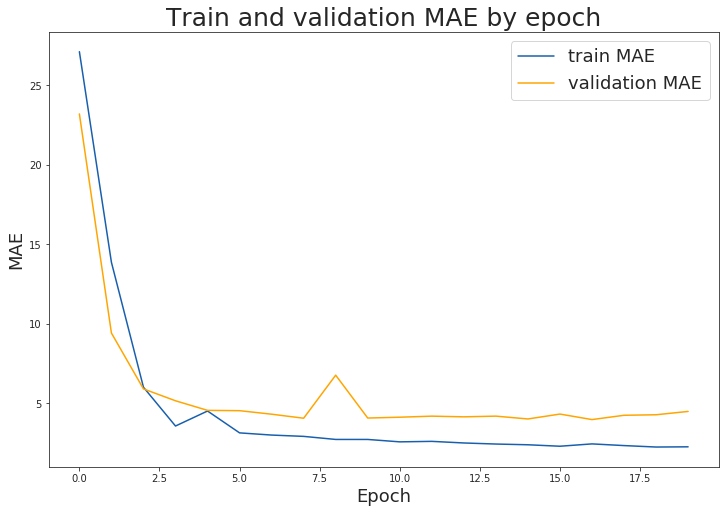

In [0]:
# train loss and test loss over epochs
train_loss = history5.history['mean_absolute_error']
val_loss = history5.history['val_mean_absolute_error']

# plot train and test loss
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train MAE', color='#185fad')
plt.plot(test_loss, label='validation MAE', color='orange')

plt.title('Train and validation MAE by epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('MAE', fontsize = 18)
# plt.ylim(-60, 2)
plt.legend(fontsize = 18);

Text(0.5, 1.0, 'test set')

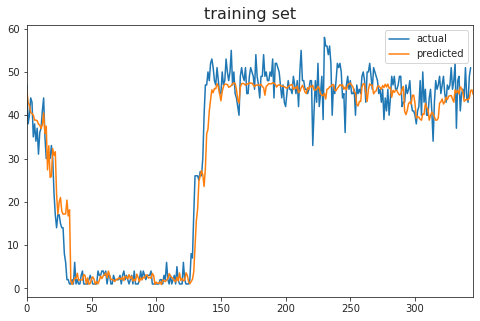

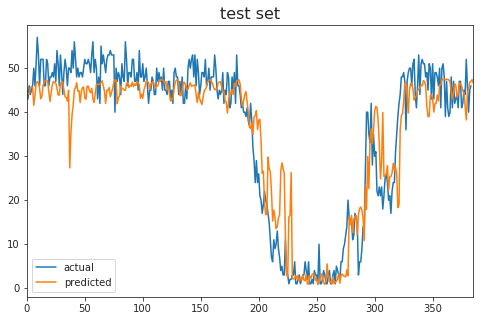

In [0]:
# generate predictions
xtrain_seq = [x for x, y in train_sequences]
xval_seq = [x for x, y in val_sequences]

ypred_train = [convlstm.predict(x)[0][0] for x in xtrain_seq]
ypred_val = [convlstm.predict(x)[0][0] for x in xval_seq]

# put predictions into dataframe
train_actual = pd.DataFrame(ytrain, columns=['actual'])
train_actual = train_actual[5:].reset_index(drop=True) # remove first 5 values from actual y
train_pred = pd.DataFrame(ypred_train, columns=['predicted'])
results_train = pd.concat([train_actual, train_pred], axis=1)

val_actual = pd.DataFrame(yval, columns=['actual'])
val_actual = val_actual[5:].reset_index(drop=True) # remove first 5 values from actual y
val_pred = pd.DataFrame(ypred_val, columns=['predicted'])
results_val = pd.concat([val_actual, val_pred], axis=1)

# plot predictions
results_train.plot(figsize=(8,5))
plt.title("training set", fontsize=16)

results_val.plot(figsize=(8,5))
plt.title("test set", fontsize=16)

#### ConvLSTM model

##### import data

In [0]:
xtrain = pd.read_pickle('xtrain.zip')
xval = pd.read_pickle('xval.zip')
xtest = pd.read_pickle('xtest.zip')
ytrain = pd.read_pickle('ytrain.zip')
yval = pd.read_pickle('yval.zip')
ytest = pd.read_pickle('ytest.zip')

xtrain = xtrain['image'].apply(lambda x:x.astype('float32')/255)
xtest = xtest['image'].apply(lambda x:x.astype('float32')/255)
xtrain_rs = np.array([x.reshape(260,260,1) for x in xtrain])
xtest_rs = np.array([x.reshape(260,260,1) for x in xtest])

ytrain = np.array(ytrain[['num_cars']])
ytest = np.array(ytest[['num_cars']])

In [0]:
from keras.preprocessing.sequence import TimeseriesGenerator

# length 3 and 5 tested
timesteps = 5
train_sequences = TimeseriesGenerator(xtrain_rs, ytrain, length=timesteps, batch_size=1)
test_sequences = TimeseriesGenerator(xtest_rs, ytest, length=timesteps, batch_size=1)

# sanity check
batch_x, batch_y = test_sequences[0]
batch_x.shape

(1, 5, 260, 260, 1)

##### compile model

In [0]:
from keras.layers.convolutional_recurrent import ConvLSTM2D
                        
# build model
convlstm2 = Sequential()
convlstm2.add(ConvLSTM2D(filters=16,kernel_size=3,activation='relu',padding='same',return_sequences=True,
                         input_shape=(timesteps,260,260,1),))
convlstm2.add(MaxPooling3D(pool_size=(1,2,2),padding='same'))
convlstm2.add(Dropout(0.25))
convlstm2.add(ConvLSTM2D(filters=4, kernel_size=3, activation='relu',padding='same',return_sequences=True))
convlstm2.add(MaxPooling3D(pool_size=(1,2,2),padding='same'))
convlstm2.add(Dropout(0.25))
convlstm2.add(ConvLSTM2D(filters=4, kernel_size=3, activation='relu',padding='same',return_sequences=True))
convlstm2.add(MaxPooling3D(pool_size=(1,2,2),padding='same'))
convlstm2.add(Dropout(0.25))
convlstm2.add(ConvLSTM2D(filters=4, kernel_size=3, activation='relu',padding='same',return_sequences=True))
convlstm2.add(MaxPooling3D(pool_size=(1,2,2),padding='same'))

convlstm2.add(Flatten()) #or GlobalAveragePooling2D()

convlstm2.add(Dense(16, activation='relu')) 
convlstm2.add(Dense(1, activation='linear'))

convlstm2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_26 (ConvLSTM2D) (None, 5, 260, 260, 16)   9856      
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 5, 130, 130, 16)   0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 130, 130, 16)   0         
_________________________________________________________________
conv_lst_m2d_27 (ConvLSTM2D) (None, 5, 130, 130, 4)    2896      
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 5, 65, 65, 4)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 65, 65, 4)      0         
_________________________________________________________________
conv_lst_m2d_28 (ConvLSTM2D) (None, 5, 65, 65, 4)    

In [0]:
# specify learning rate (if needed)
opt = optimizers.Adam(lr=0.001)

convlstm2.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae']) 

history6 = convlstm2.fit_generator(train_sequences,
                                 validation_data = test_sequences,
                                 epochs=15,
                                 verbose=1,) 
                                #  callbacks=[EarlyStopping(monitor='val_loss',min_delta=0,patience=5,mode='auto')])

Epoch 1/15
349/349 [==============================] - 55s 158ms/step - loss: 264.9103 - mean_absolute_error: 11.9896 - val_loss: 458.9770 - val_mean_absolute_error: 18.7937
Epoch 2/15
349/349 [==============================] - 41s 117ms/step - loss: 65.3806 - mean_absolute_error: 6.4307 - val_loss: 245.7955 - val_mean_absolute_error: 13.7124
Epoch 3/15
349/349 [==============================] - 41s 118ms/step - loss: 47.6103 - mean_absolute_error: 5.2283 - val_loss: 171.1554 - val_mean_absolute_error: 11.3599
Epoch 4/15
349/349 [==============================] - 41s 117ms/step - loss: 40.0023 - mean_absolute_error: 4.7488 - val_loss: 226.2205 - val_mean_absolute_error: 13.0822
Epoch 5/15
349/349 [==============================] - 41s 117ms/step - loss: 39.8051 - mean_absolute_error: 4.7731 - val_loss: 107.4727 - val_mean_absolute_error: 8.8038
Epoch 6/15
349/349 [==============================] - 41s 116ms/step - loss: 39.7874 - mean_absolute_error: 4.5487 - val_loss: 214.9048 - val_me

##### evaluate model

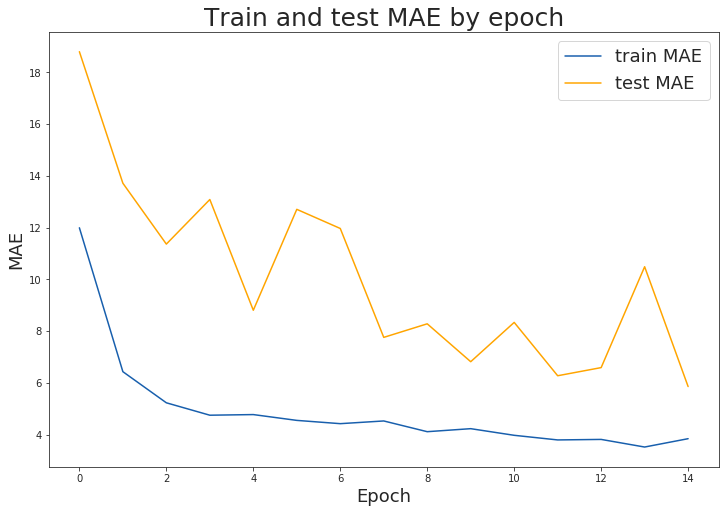

In [0]:
# train loss and test loss over epochs
train_loss = history6.history['mean_absolute_error']
test_loss = history6.history['val_mean_absolute_error']

# plot train and test loss
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train MAE', color='#185fad')
plt.plot(test_loss, label='test MAE', color='orange')

plt.title('Train and test MAE by epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('MAE', fontsize = 18)
# plt.ylim(-60, 2)
plt.legend(fontsize = 18);

Text(0.5, 1.0, 'test set')

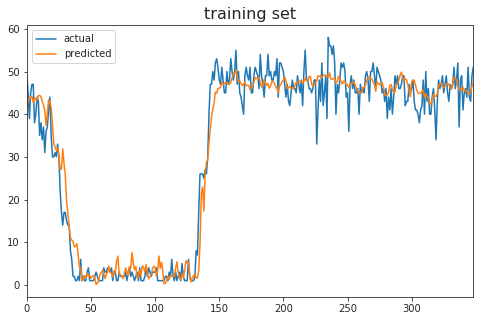

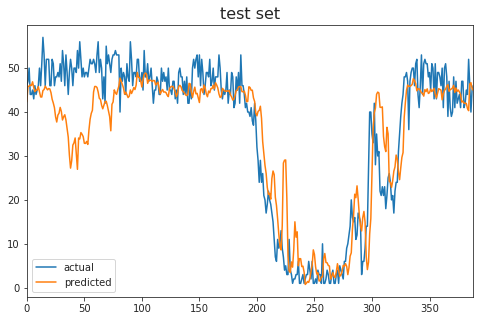

In [0]:
# generate predictions
xtrain_seq = [x for x, y in train_sequences]
xtest_seq = [x for x, y in test_sequences]

ypred_train = [convlstm2.predict(x)[0][0] for x in xtrain_seq]
ypred_test = [convlstm2.predict(x)[0][0] for x in xtest_seq]

# put predictions into dataframe
train_actual = pd.DataFrame(ytrain, columns=['actual'])
train_actual = train_actual[5:].reset_index(drop=True) # remove first 5 values from actual y
train_pred = pd.DataFrame(ypred_train, columns=['predicted'])
results_train = pd.concat([train_actual, train_pred], axis=1)

test_actual = pd.DataFrame(ytest, columns=['actual'])
test_actual = test_actual[5:].reset_index(drop=True) # remove first 5 values from actual y
test_pred = pd.DataFrame(ypred_test, columns=['predicted'])
results_test = pd.concat([test_actual, test_pred], axis=1)

# plot predictions
results_train.plot(figsize=(8,5))
plt.title("training set", fontsize=16)

results_test.plot(figsize=(8,5))
plt.title("test set", fontsize=16)